#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Project 1. Unsupervised Learning on Bank Marketing Data </span>


## <span style="font-family: Latin Modern Roman; font-size: 25px; font-style: italic;"> 1. Introduction </span>
<div style="text-align: justify;">

In order to investigate how financial companies can accurately forecast client responses to direct marketing efforts, we are use the **Bank Marketing Dataset** for this study. This dataset includes demographic data about the target audience, past marketing campaign responses, and other characteristics specific to bank customers. Therefore, represents a relevant tool for comprehending the complex relationships between consumer preferences and behavior in the banking industry as we can get to know which are the elements that influence consumer engagement and loyalty by looking at patterns in the dataset, such as the frequency of favorable responses to particular campaign types, respondent demographic trends, and the impact of outside factors on campaign success rates.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Real World Problem </span>
<div style="text-align: justify;">

Improving the efficacy of bank marketing initiatives is the main **problem** in this situation. One-size-fits-all tactics are frequently used in traditional marketing techniques, which can lead to low conversion rates and wasteful resource usage. The objective is to find more sophisticated, data-driven approaches that can more effectively target the right clients with the correct offers, raising the probability of favorable reactions and enhancing campaign effectiveness overall.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Role of Unsupervised Learning </span>
<div style="text-align: justify;">

- **Principal Component Analysis (PCA)**: this technique minimizes the dimensionality of the dataset while preserving the majority of its variance. As a result, the dataset is more straightforward to examine and visualize. It can improve the performance of clustering by focusing on the most informative features, thus providing more meaningful customer segments. For instance, we could identify the most relevant features that influence customer responses to marketing campaigns.

- **Cluster Analysis**: based on shared characteristics, including account information, demographics, and past campaign responses, this technique can divide the bank's customer base into discrete clusters. The bank might potentially increase the campaign's success rate by customizing its marketing techniques to each group's unique demands and preferences by identifying these groups.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Objectives </span>
<div style="text-align: justify;">

Using unsupervised learning techniques to find hidden patterns and client segmentation in the bank marketing data is the main **goal** of this investigation. The bank may optimize resource allocation and boost conversion rates by creating tailored marketing campaigns that are more likely to resonate with each customer segment by knowing the traits that set them apart.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 25px; font-style: italic;"> 2. Exploratory Data Analysis </span>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Variables </span>
<div style="text-align: justify;">

*Description provided by Berkay Alan, the dataset's author*

**Main:**
* `age` (numeric)

* `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

* `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

* `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

* `default`: has credit in default? (categorical: 'no','yes','unknown')

* `housing`: has housing loan? (categorical: 'no','yes','unknown')

* `loan`: has personal loan? (categorical: 'no','yes','unknown')


**Related with the last contact of the current campaign:**

* `contact`: contact communication type (categorical: 'cellular','telephone')

* `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

* ` day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

* ` duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

* `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* `previous`: number of contacts performed before this campaign and for this client (numeric)

* `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


**Social and economic context attributes:**

* `emp.var.rate`: employment variation rate - quarterly indicator (numeric)

* `cons.price.idx`: consumer price index - monthly indicator (numeric)

* `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)

* `euribor3m`: euribor 3 month rate - daily indicator (numeric)

* `nr.employed`: number of employees - quarterly indicator (numeric)

* `subscribed`: has the client subscribed a term deposit? (binary: 'yes','no')


</div>


In [1]:
# Required libraries

import os
import numpy as np
import pandas as pd

In [2]:
cwd = os.getcwd()
data_dir = os.path.join(cwd, "bank_marketing_dataset.csv")

df = pd.read_csv(data_dir)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Check number of rows in dataset
df.shape

(41188, 21)

In [5]:
# Check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


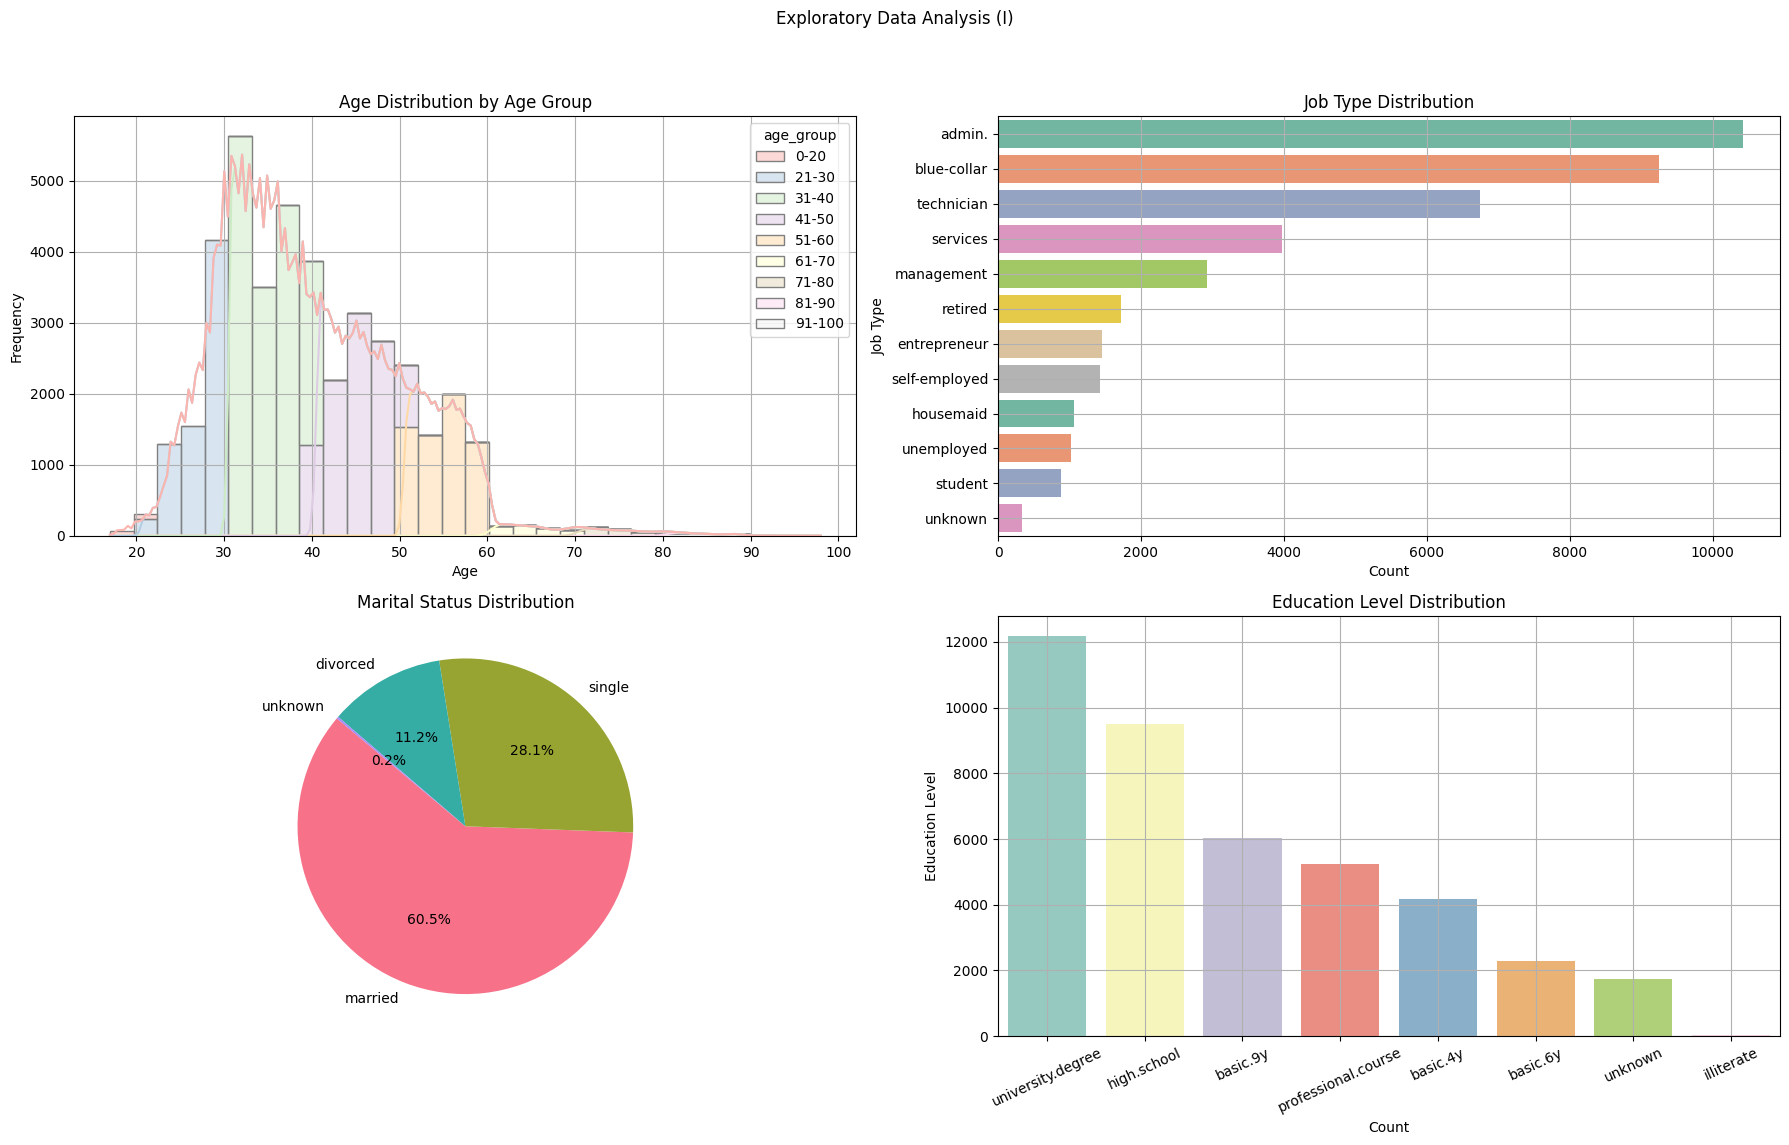

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Subplot area
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Exploratory Data Analysis (I)')

# Age Distribution by Age Group
sns.histplot(data=df, x='age', hue='age_group', multiple='stack', palette='Pastel1', edgecolor='gray', ax=axes[0, 0], bins=30, kde=True)
axes[0, 0].set_title('Age Distribution by Age Group')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# Job Type Distribution
job_types = df['job'].value_counts().index
colors = sns.color_palette("Set2", len(job_types))
for i, job in enumerate(job_types):
    sns.barplot(x=[df[df['job'] == job]['job'].count()], y=[job], ax=axes[0, 1], color=colors[i])
axes[0, 1].set_title('Job Type Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Job Type')
axes[0, 1].grid(True)

# Marital Status Distribution
marital_counts = df['marital'].value_counts()
axes[1, 0].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(marital_counts)))
axes[1, 0].set_title('Marital Status Distribution')

# Education Level Distribution
sns.countplot(x='education', data=df, order=df['education'].value_counts().index, ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Education Level Distribution')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Level')
axes[1, 1].tick_params(axis='x', rotation=25, labelsize='medium')
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


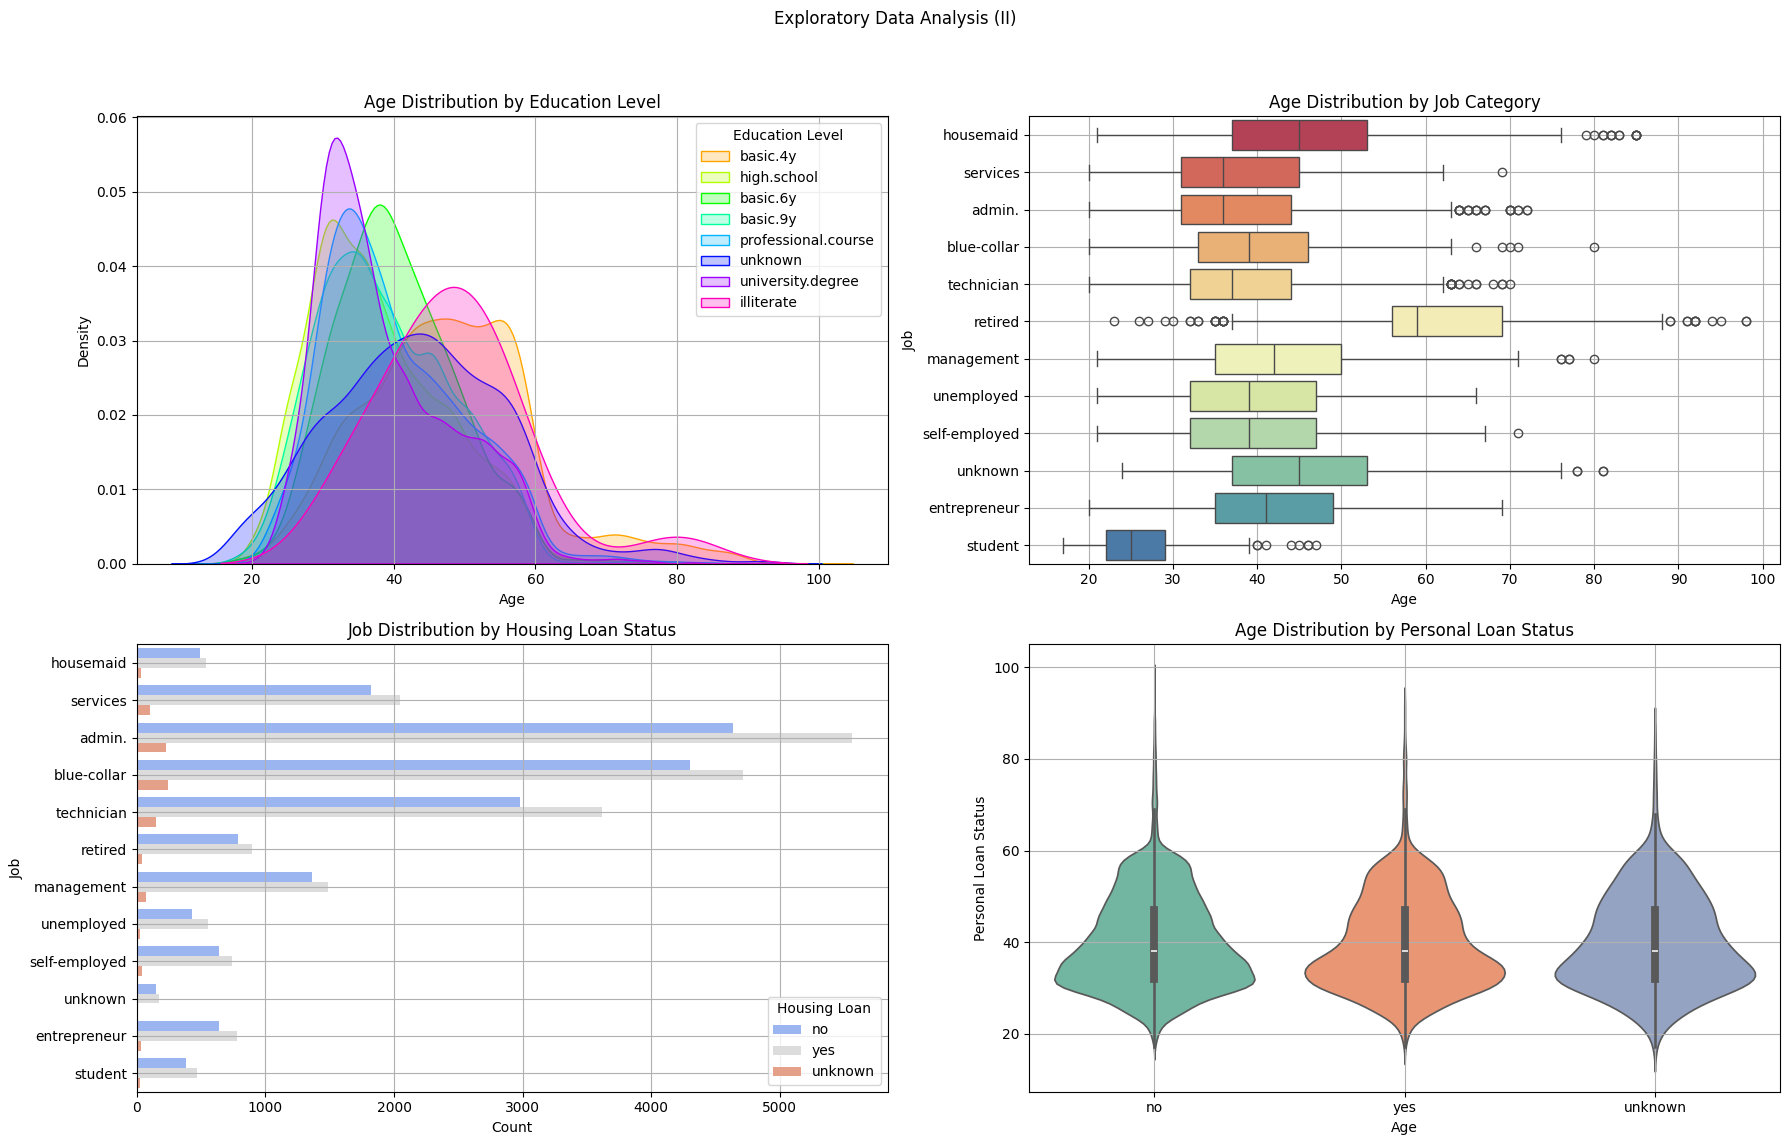

In [34]:
warnings.filterwarnings("ignore")

# Setting up the subplot area
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Adjust the size as needed
fig.suptitle('Exploratory Data Analysis (II)')

# Age Distribution by Education Level
education_levels = df['education'].unique()
palette = sns.color_palette("hsv", len(education_levels))
for i, level in enumerate(education_levels):
    sns.kdeplot(df[df['education'] == level]['age'], ax=axes[0, 0], shade=True, label=level, color=palette[i])
axes[0, 0].set_title('Age Distribution by Education Level')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend(title='Education Level')
axes[0, 0].grid(True)

# Age and Job Distribution
sns.boxplot(x='age', y='job', data=df, ax=axes[0, 1], palette='Spectral')
axes[0, 1].set_title('Age Distribution by Job Category')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Job')
axes[0, 1].grid(True)

# Job and Housing Loan Distribution
sns.countplot(y='job', hue='housing', data=df, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Job Distribution by Housing Loan Status')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Job')
axes[1, 0].legend(title='Housing Loan')
axes[1, 0].grid(True)

# Age and Personal Loan Distribution
sns.violinplot(x='loan', y='age', data=df, palette='Set2')
axes[1, 1].set_title('Age Distribution by Personal Loan Status')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Personal Loan Status')
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for the main title and subplots
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 25px; font-style: italic;"> 3. Principal Component Analysis (PCA) </span>
